<a href="https://colab.research.google.com/github/AdarshNagpure/Stock-Market-Prediction-using-RNN/blob/main/Using_LSTM_and_accuracy_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
pip install yfinance --upgrade --no-cache-dir 


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
pip install yfinance


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
import yfinance as yf
df= yf.download('RELIANCE.NS', period='2000d', interval='1d')

[*********************100%***********************]  1 of 1 completed


In [11]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-04-23,437.775330,440.524261,430.444824,434.407257,412.881165,6155401
2015-04-24,434.382477,438.072510,430.246704,435.323578,413.752014,5865595
2015-04-27,435.893158,439.583191,431.633545,433.540466,412.057312,5096308
2015-04-28,433.243286,436.859009,425.244110,428.537903,407.302612,6778219
2015-04-29,426.952911,431.187775,419.721466,421.009247,400.147034,7563040
...,...,...,...,...,...,...
2023-05-22,2435.000000,2466.000000,2432.350098,2455.000000,2455.000000,3431208
2023-05-23,2460.649902,2468.000000,2451.449951,2454.550049,2454.550049,2811473
2023-05-24,2445.899902,2464.000000,2433.449951,2440.250000,2440.250000,3743804


In [12]:
df1=df.reset_index().Close

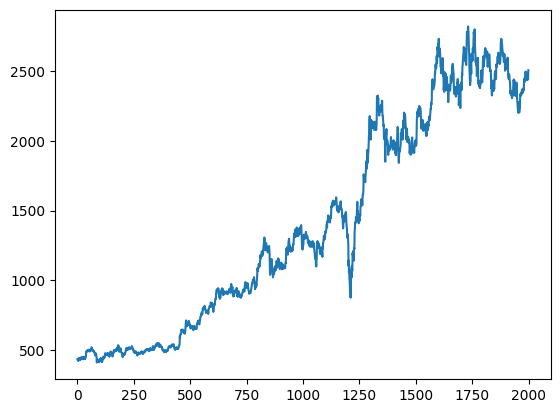

In [13]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [14]:
df1.shape

(2000,)

In [15]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler #LSTM sensitive to scale of data
scaler= MinMaxScaler(feature_range=(0.25,0.75))
df1= scaler.fit_transform(np.array(df1).reshape(-1,1))

In [18]:
df1.shape


(2000, 1)

In [19]:
training_size= int(len(df1)*0.65)
test_size=len(df)-training_size
train_data, test_data= df1[0:training_size,:], df1[training_size:len(df1),:]

In [20]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [21]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [22]:
X_train.shape, y_train.shape

((1199, 100), (1199,))

In [23]:
X_test.shape

(599, 100)

In [24]:
X_train

array([[0.2548832 , 0.25507339, 0.25470329, ..., 0.25195842, 0.25457479,
        0.25385002],
       [0.25507339, 0.25470329, 0.25366497, ..., 0.25457479, 0.25385002,
        0.25322805],
       [0.25470329, 0.25366497, 0.25210234, ..., 0.25385002, 0.25322805,
        0.25352619],
       ...,
       [0.43790058, 0.43533049, 0.44082022, ..., 0.59183072, 0.6101684 ,
        0.61225437],
       [0.43533049, 0.44082022, 0.44017257, ..., 0.6101684 , 0.61225437,
        0.61671686],
       [0.44082022, 0.44017257, 0.43430243, ..., 0.61225437, 0.61671686,
        0.5998943 ]])

In [25]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
#For LSTM

In [26]:
!pip install tensorflow

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [27]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [28]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
19/19 [==============================] - 18s 393ms/step - loss: 0.0239 - val_loss: 0.0233
Epoch 2/100
19/19 [==============================] - 4s 224ms/step - loss: 0.0020 - val_loss: 0.0149
Epoch 3/100
19/19 [==============================] - 5s 261ms/step - loss: 0.0011 - val_loss: 0.0075
Epoch 4/100
19/19 [==============================] - 5s 249ms/step - loss: 6.4954e-04 - val_loss: 0.0032
Epoch 5/100
19/19 [==============================] - 4s 224ms/step - loss: 3.5542e-04 - val_loss: 0.0012
Epoch 6/100
19/19 [==============================] - 7s 392ms/step - loss: 2.2674e-04 - val_loss: 4.7339e-04
Epoch 7/100
19/19 [==============================] - 7s 354ms/step - loss: 1.9340e-04 - val_loss: 7.3150e-04
Epoch 8/100
19/19 [==============================] - 6s 335ms/step - loss: 1.9004e-04 - val_loss: 6.1398e-04
Epoch 9/100
19/19 [==============================] - 5s 263ms/step - loss: 1.8746e-04 - val_loss: 6.6796e-04
Epoch 10/100
19/19 [==============================

In [29]:
train_predict=model.predict(X_train)
test_predict= model.predict(X_test)

19/19 [==============================] - 1s 78ms/step


In [30]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [31]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

1059.1136158322734

In [32]:
math.sqrt(mean_squared_error(ytest,test_predict))

2499.5558649827253

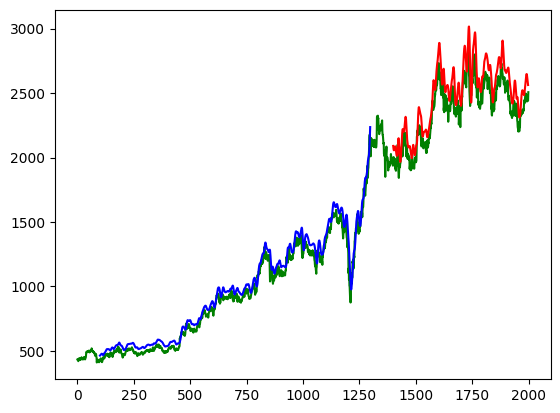

In [36]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1), color="green")
plt.plot(trainPredictPlot, color="blue")
plt.plot(testPredictPlot, color="red")
plt.show()

In [37]:
len(test_data)

700

In [38]:
x_input=test_data[len(test_data)-100:].reshape(1,-1)
x_input.shape

(1, 100)

In [39]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [40]:
temp_input

[0.6925999348874166,
 0.693409389267962,
 0.6993662823257443,
 0.6954538519221178,
 0.6874628842249546,
 0.6865288750135978,
 0.6912715358273192,
 0.7037042666224358,
 0.695734024281579,
 0.6890402916001892,
 0.6777180649211145,
 0.6768878345110196,
 0.6720102308517122,
 0.6792124695246367,
 0.6783614630849923,
 0.6778114557076016,
 0.6717092317894586,
 0.6691459258022363,
 0.6661674539367237,
 0.6592350502817287,
 0.6498534567823051,
 0.6545027268095394,
 0.6532781572239464,
 0.6503826881301463,
 0.6476948273121127,
 0.648120330531935,
 0.644477684472995,
 0.6433257296443398,
 0.6528837673752057,
 0.65373477381485,
 0.6497081259219442,
 0.646947650346973,
 0.6583114290851466,
 0.6694883755771033,
 0.6690940364016054,
 0.671200725797924,
 0.6658457295181635,
 0.6699346548264751,
 0.6584774346285713,
 0.6561112982290982,
 0.6594737212553339,
 0.6561839636592786,
 0.6467815941303054,
 0.6512129185402412,
 0.6475080457391384,
 0.6598265590449756,
 0.6646626613184268,
 0.6664580649842027,


In [41]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))  # reshaped, 1 means batch size, n_steps means time steps, 1 means number
                                                    # of features
        
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

[0.6946379]
101
1 day input [0.69340939 0.69936628 0.69545385 0.68746288 0.68652888 0.69127154
 0.70370427 0.69573402 0.68904029 0.67771806 0.67688783 0.67201023
 0.67921247 0.67836146 0.67781146 0.67170923 0.66914593 0.66616745
 0.65923505 0.64985346 0.65450273 0.65327816 0.65038269 0.64769483
 0.64812033 0.64447768 0.64332573 0.65288377 0.65373477 0.64970813
 0.64694765 0.65831143 0.66948838 0.66909404 0.67120073 0.66584573
 0.66993465 0.65847743 0.6561113  0.65947372 0.65618396 0.64678159
 0.65121292 0.64750805 0.65982656 0.66466266 0.66645806 0.65439895
 0.64681271 0.63888402 0.63710939 0.62903542 0.62672112 0.62614
 0.62160485 0.63581215 0.63724433 0.63126666 0.62203035 0.6291392
 0.63130816 0.62854764 0.64854583 0.64862884 0.64746654 0.65070441
 0.64725899 0.6496459  0.6517837  0.65362061 0.65610091 0.65047613
 0.65289416 0.6516592  0.65227148 0.6541395  0.65788593 0.65499051
 0.65809348 0.66711185 0.67137717 0.66702885 0.67281969 0.67152245
 0.67778029 0.67936814 0.682907   0.67

In [42]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [43]:
import matplotlib.pyplot as plt

In [46]:
loss = model.evaluate(X_test, ytest)
accuracy = 1 - loss  # Assuming you are using a loss function where a lower value indicates better performance

print("Accuracy: {:.2f}%".format(accuracy * 100))


19/19 [==============================] - 2s 82ms/step - loss: 9.2901e-04
Accuracy: 99.91%


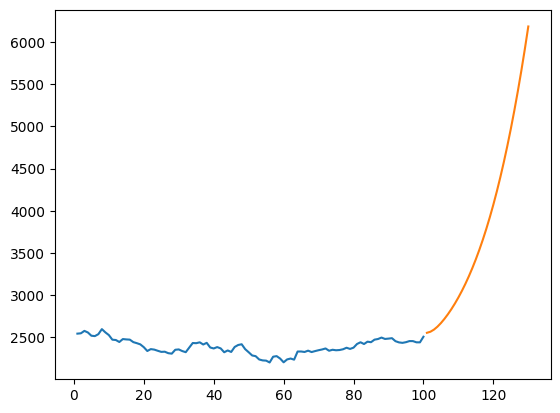

In [47]:
plt.plot(day_new,scaler.inverse_transform(df1[len(df1)-100:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))